<a href="https://colab.research.google.com/github/naveen-ramavath/machine-learning/blob/main/week_9_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### perceptron simple code with single neuron

In [ ]:
import numpy as np

def sigmoid(x):
  # Our activation function: f(x) = 1 / (1 + e^(-x))
  return 1 / (1 + np.exp(-x))

class Neuron:
  def __init__(self, weights, bias):
    self.weights = weights
    self.bias = bias

  def feedforward(self, inputs):
    # Weight inputs, add bias, then use the activation function
    total = np.dot(self.weights, inputs) + self.bias
    return sigmoid(total)

weights = np.array([0, 1]) # w1 = 0, w2 = 1
bias = 4                   # b = 4
n = Neuron(weights, bias)

x = np.array([2, 3])       # x1 = 2, x2 = 3
print(n.feedforward(x))    # 0.9990889488055994


0.9990889488055994


trains the perceptron

In [ ]:
import numpy as np

# Step 1: Input (X) and Output (Y)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
Y = np.array([[0], [0], [0], [1]])

# Step 2: Initialize weights and bias
weights = np.random.rand(2, 1)
bias = np.random.rand(1)
learning_rate = 0.1

# Step 3: Define sigmoid and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Step 4: Train the perceptron
for epoch in range(10000):
    # Forward pass
    z = np.dot(X, weights) + bias
    output = sigmoid(z)

    # Calculate error
    error = Y - output

    # Backpropagation (update weights and bias)
    d_output = error * sigmoid_derivative(output)
    weights += np.dot(X.T, d_output) * learning_rate
    bias += np.sum(d_output) * learning_rate

# Step 5: Test final output
print("Final output after training:")
print(np.round(output))


Final output after training:
[[0.]
 [0.]
 [0.]
 [1.]]


2.Perceptron with activation Function with AND, OR (linear data), XOR (non linear data)

In [ ]:
import numpy as np


In [ ]:
def step_function(x):
    return 1 if x >= 0 else 0


In [ ]:
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def activation(self, x):
        return 1 if x >= 0 else 0

    def train(self, X, Y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            for i in range(len(X)):
                z = np.dot(X[i], self.weights) + self.bias
                y_pred = self.activation(z)
                error = Y[i] - y_pred

                # Update weights & bias
                self.weights += self.lr * error * X[i]
                self.bias += self.lr * error

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        return np.array([self.activation(i) for i in z])


In [ ]:
# Input and output for AND
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0, 0, 0, 1])

p = Perceptron()
p.train(X, Y)
print("AND Predictions:", p.predict(X))


AND Predictions: [0 0 0 1]


In [ ]:
# Input and output for OR
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0, 1, 1, 1])

p = Perceptron()
p.train(X, Y)
print("OR Predictions:", p.predict(X))


OR Predictions: [0 1 1 1]


In [ ]:
# Input and output for XOR
X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([0, 1, 1, 0])

p = Perceptron()
p.train(X, Y)
print("XOR Predictions:", p.predict(X))


XOR Predictions: [1 1 0 0]


multi layer perceptron

In [ ]:
import numpy as np

# Sigmoid and derivative
sig = lambda x: 1/(1+np.exp(-x))
dsig = lambda x: x*(1-x)

# XOR Data
X = np.array([[0,0],[0,1],[1,0],[1,1]])
Y = np.array([[0],[1],[1],[0]])

# Initialize weights
wh = np.random.rand(2,2)
bh = np.random.rand(1,2)
wout = np.random.rand(2,1)
bout = np.random.rand(1,1)

lr = 0.5

# Train
for _ in range(10000):
    h = sig(np.dot(X,wh)+bh)
    out = sig(np.dot(h,wout)+bout)
    e = Y - out
    out_delta = e*dsig(out)
    h_delta = out_delta.dot(wout.T)*dsig(h)
    wout += h.T.dot(out_delta)*lr
    bout += np.sum(out_delta,axis=0,keepdims=True)*lr
    wh += X.T.dot(h_delta)*lr
    bh += np.sum(h_delta,axis=0,keepdims=True)*lr

print("XOR Output:")
print(np.round(out))


XOR Output:
[[0.]
 [1.]
 [1.]
 [0.]]


### 4.MLP on MNIST dataset and display its train and test data score.

In [1]:
# Import libraries
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Step 1: Load MNIST dataset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)   # convert labels from string to int

# Step 2: Normalize data (0–1 range)
X = X / 255.0

# Step 3: Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Create MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,),   # single hidden layer with 100 neurons
                    activation='relu',
                    solver='adam',
                    max_iter=20,
                    random_state=42)

# Step 5: Train the model
mlp.fit(X_train, y_train)

# Step 6: Evaluate on train and test data
train_score = mlp.score(X_train, y_train)
test_score = mlp.score(X_test, y_test)

print("Train Accuracy:", train_score)
print("Test Accuracy:", test_score)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.9979107142857143
Test Accuracy: 0.9746428571428571


### 5. Find the relation between learning rate and loss (or) number  of iterations and loss.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


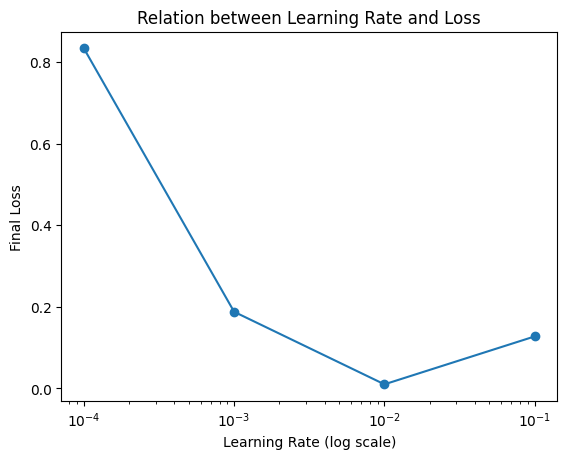

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Step 1: Load and prepare data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X, y = X[:5000]/255.0, y[:5000].astype(int)  # use only 5000 samples for speed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Try different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]
loss_values = []

for lr in learning_rates:
    mlp = MLPClassifier(hidden_layer_sizes=(50,), activation='relu',
                        solver='adam', learning_rate_init=lr,
                        max_iter=15, random_state=42)
    mlp.fit(X_train, y_train)
    loss_values.append(mlp.loss_)  # final loss after training

# Step 3: Plot relation
plt.plot(learning_rates, loss_values, marker='o')
plt.xscale('log')
plt.xlabel("Learning Rate (log scale)")
plt.ylabel("Final Loss")
plt.title("Relation between Learning Rate and Loss")
plt.show()


### 6. Find the relation between number of neurons with learning rate and iterations.

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (15) reached and the optimization hasn't converged yet.
  warnings.warn(


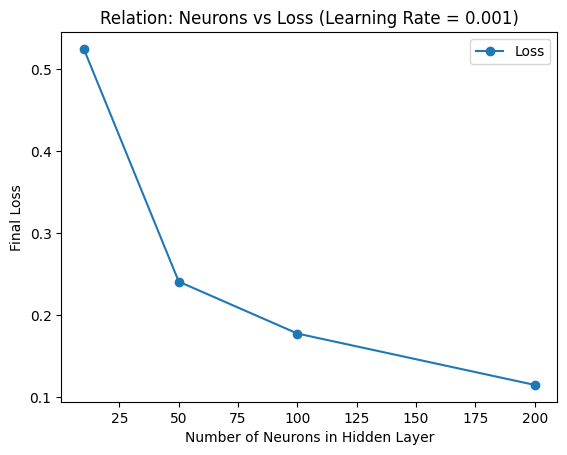

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# Load small MNIST subset
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
X, y = X[:3000] / 255.0, y[:3000].astype(int)  # small subset for speed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different hidden neuron sizes
neuron_counts = [10, 50, 100, 200]
train_scores, test_scores, losses = [], [], []

for n in neuron_counts:
    mlp = MLPClassifier(hidden_layer_sizes=(n,), learning_rate_init=0.001,
                        max_iter=15, random_state=42)
    mlp.fit(X_train, y_train)
    train_scores.append(mlp.score(X_train, y_train))
    test_scores.append(mlp.score(X_test, y_test))
    losses.append(mlp.loss_)

# Plot relation
plt.plot(neuron_counts, losses, marker='o', label="Loss")
plt.xlabel("Number of Neurons in Hidden Layer")
plt.ylabel("Final Loss")
plt.title("Relation: Neurons vs Loss (Learning Rate = 0.001)")
plt.legend()
plt.show()
